In [1]:
# Import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns
import pylab as pl
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import os
import qgrid
import ipywidgets as widgets

# Raw Input Data Loading and Cleaning

### Load and Clean Raw Heart Disease Patient Data

In [2]:
# load heart attack raw data into memory from DATA file
# Display first row

with open('heart_raw.data', 'r') as file:
    heart_raw_data = file.read().replace('\n', ' ')
    heart_raw_data = heart_raw_data.split("name")
    heart_raw_data = [x.strip(' ') for x in heart_raw_data]
    heart_raw_data = [x.split(' ') for x in heart_raw_data]
print( heart_raw_data[0] )

['1', '0', '63', '1', '-9', '-9', '-9', '-9', '1', '145', '1', '233', '-9', '50', '20', '1', '-9', '1', '2', '2', '3', '81', '0', '0', '0', '0', '0', '1', '10.5', '6', '13', '150', '60', '190', '90', '145', '85', '0', '0', '2.3', '3', '-9', '172', '0', '-9', '-9', '-9', '-9', '-9', '-9', '6', '-9', '-9', '-9', '2', '16', '81', '0', '1', '1', '1', '-9', '1', '-9', '1', '-9', '1', '1', '1', '1', '1', '1', '1', '-9', '-9']


### Load Field Names for Heart Disease Patient Data

In [3]:
# load heart attack raw data fields into memory from DATA file
# Display data

with open('field_names.data', 'r') as file:
    heart_raw_field_names = file.read().replace('\n', ' ')
    heart_raw_field_names = heart_raw_field_names.split(",")
    heart_raw_field_names = [x.strip(' ') for x in heart_raw_field_names]
print( heart_raw_field_names )

['ID', 'ccf', 'Age', 'Gender', 'Chest Pain Location', 'Pain During Exercise', 'Relieved After Rest', 'pncaden', 'Chest Pain Type', 'Resting Blood Pressure', 'htn', 'Cholesterol', 'Is a Smoker', 'Cigarettes Smoked Per Day', 'Number of Years as Smoker', 'Fasting Blood Sugar', 'History of Diabetes', 'Family History of Coronary Heart Disease', 'Resting ECG', 'ekgmo', 'ekgday', 'ekgyr', 'dig', 'prop', 'nitr', 'pro', 'diuretic', 'proto', 'thaldur', 'thaltime', 'met', 'Max Heart Rate', 'Resting Heart Rate', 'tpeakbps', 'tpeakbpd', 'dummy', 'trestbpd', 'Exercise Induced Angina', 'xhypo', 'ECG Peak Change From Exercise', 'ECG Slope', 'rldv5', 'rldv5e', 'ca', 'restckm', 'exerckm', 'restef', 'restwm', 'exeref', 'exerwm', 'Thalium Stress Test', 'thalsev', 'thalpul', 'earlobe', 'cmo', 'cday', 'cyr', 'Diagnosis of Heart Disease', 'lmt', 'ladprox', 'laddist', 'diag', 'cxmain', 'ramus', 'om1', 'om2', 'rcaprox', 'rcadist', 'lvx1', 'lvx2', 'lvx3', 'lvx4', 'lvf', 'cathef', 'junk']


### Create a Dictionary Object using the Field Names and Heart Patient Data

In [4]:
# Process the raw heart data to build a dictionary object

processed_heart_data = []
for heart_data_idx in range(len(heart_raw_data)):
    heart_data_obj = {}
    heart_raw_row = heart_raw_data[heart_data_idx]
    
    if( len( heart_raw_row) != len( heart_raw_field_names) ):
        # Skip any rows that are not complete
        continue
    
    for key_idx in range(len(heart_raw_field_names)):
        field_name = heart_raw_field_names[key_idx]
        heart_data_obj[field_name] = heart_raw_row[key_idx]
    
    processed_heart_data.append( heart_data_obj)

### Process the Dictionary into a Pandas DataFrame
- Drop incomplete data columns
- Extract a subset of columns
- Convert all columns from string to float type
- Normalize the diagnosis column to be binary

In [5]:
# Convert processed data dictionary of heart data into a Pandas DataFrame

processed_heart_data = pd.DataFrame.from_dict(processed_heart_data)
     
# Drop all columns with incomplete data, values of -9 are incomplete data for a patient
processed_heart_data = processed_heart_data.loc[:, ~(processed_heart_data == '-9').any()]

# Extract only a subset of columns from the processed data to use in the prediction algorithm
processed_heart_data_subset = processed_heart_data.filter(
    [
        'Age',
        'Gender',
        'Chest Pain Type', 
        'Resting Blood Pressure',
        'Cholesterol',
        'Fasting Blood Sugar',
        'Resting ECG',
        'Max Heart Rate',
        'Resting Heart Rate',
        'Exercise Induced Angina',
        'ECG Peak Change From Exercise',
        'ECG Slope',
        'Diagnosis of Heart Disease'
    ], 
    axis=1)

# Convert all values to float type
processed_heart_data_subset = processed_heart_data_subset.astype(float)

# Normalize the diagnosis to be 0 or 1
processed_heart_data_subset.loc[
    (processed_heart_data_subset['Diagnosis of Heart Disease'] > 1),'Diagnosis of Heart Disease'] = 1

### Display the Data in a Grid for Querying

In [24]:
grid = qgrid.show_grid(processed_heart_data_subset.copy(), 
   grid_options={
    'editable': False,
    'sortable': True,
    'filterable': True,
    'highlightSelectedRow': True
   },
    
    column_options={
    'maxWidth': 70,
    'minWidth': 30,
    'resizable': True,
    'sortable': True
})

grid.layout.width = "900px"
grid.layout.height = "185px"
grid

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

# Prediction Algorithm

### Setup Data

In [7]:
heart_data_without_output = processed_heart_data_subset.drop(['Diagnosis of Heart Disease'], axis=1)
heart_data_diagnosis = processed_heart_data_subset['Diagnosis of Heart Disease']

In [8]:
heart_disease_classifier = RandomForestClassifier()

hd_no_output_train, hd_no_output_test, hd_output_train, hd_output_test = train_test_split(heart_data_without_output, heart_data_diagnosis, test_size= 0.5)

heart_disease_classifier.fit(hd_no_output_train, hd_output_train)

RandomForestClassifier()

### Classifier Score

In [10]:
heart_disease_classifier.score(hd_no_output_test, hd_output_test)


0.7375886524822695

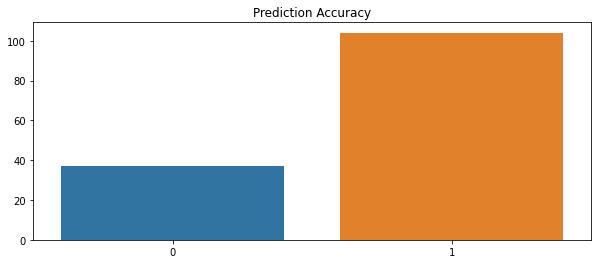

In [11]:
predictions = heart_disease_classifier.predict(hd_no_output_test)
hd_output_test_array = hd_output_test.array

matches_predictions = [];
matches_predictions.append(0)
matches_predictions.append(0)

for x in range( len( hd_output_test_array ) ):
    if predictions[x] == hd_output_test_array[x]:
        matches_predictions[1] = matches_predictions[1] + 1
    else:
        matches_predictions[0] = matches_predictions[0] + 1
        
pl.figure(figsize=(10,4))
pl.title("Prediction Accuracy")
ax = sns.barplot(x=[0,1], y=matches_predictions)

### Input Data to Get a Prediction

In [29]:
age_label = widgets.Label(value="Age (Years)");

age = widgets.IntText(
    disabled=False
)
display( age_label )
display( age )

gender_label = widgets.Label(value="Gender (0: Female | 1: Male)");

gender = widgets.BoundedIntText(
    disabled=False,
    min=0,
    max=1
)

display( gender_label )
display( gender )

chest_pain_type_label = widgets.Label(value="Chest Pain Type (1: Typical Angina | 2: Atypical Angina | 3: Non-anginal pain | 4: Asymptomatic)");

chest_pain_type = widgets.BoundedIntText(
    disabled=False,
    min=1,
    max=4
)

display( chest_pain_type_label )
display( chest_pain_type )

resting_blood_pressure_label = widgets.Label(value="Resting Blood Pressure");

resting_blood_pressure = widgets.IntText(
    disabled=False
)

display( resting_blood_pressure_label )
display( resting_blood_pressure )


cholesterol_label = widgets.Label(value="Cholesterol");

cholesterol = widgets.IntText(
    disabled=False
)

display( cholesterol_label )
display( cholesterol )

fasting_blood_sugar_label = widgets.Label(value="Fasting Blood Sugar (0: Blood sugar <120 mg/dl | 1: Blood sugar >120mg/dl)");

fasting_blood_sugar = widgets.BoundedIntText(
    disabled=False,
    min=0,
    max=1
)

display( fasting_blood_sugar_label )
display( fasting_blood_sugar )

resting_ecg_label = widgets.Label(value="Resting ECG (0: Normal | 1: ST-T Wave Abnormality | 2: Ventricular Hypertrophy)");

resting_ecg = widgets.BoundedIntText(
    disabled=False,
    min=0,
    max=2
)

display( resting_ecg_label )
display( resting_ecg )

max_heart_rate_label = widgets.Label(value="Max Heart Rate");

max_heart_rate = widgets.IntText(
    disabled=False
)

display( max_heart_rate_label )
display( max_heart_rate )

resting_heart_rate_label = widgets.Label(value="Resting Heart Rate");

resting_heart_rate = widgets.IntText(
    disabled=False
)

display( resting_heart_rate_label )
display( resting_heart_rate )

pain_induced_angina_label = widgets.Label(value="Exercise Induced Angina (0: No Pain | 1: Pain Occurs)");

pain_induced_angina = widgets.BoundedIntText(
    disabled=False,
    min=0,
    max=1
)

display( pain_induced_angina_label )
display( pain_induced_angina )


peak_change_label = widgets.Label(value="ECG Peak Change From Exercise");

peak_change = widgets.FloatText(
    disabled=False
)

display( peak_change_label )
display( peak_change )


ecg_slope_label = widgets.Label(value="ECG Slope (1: Upsloping | 2: Flat | 3: Downsloping)");

ecg_slope = widgets.BoundedIntText(
    disabled=False,
    min=1,
    max=3
)

display( ecg_slope_label )
display( ecg_slope )

generate_button = widgets.Button(
    description='Generate Prediction',
    disabled=False,
    button_style='',
    tooltip='Click for prediction'
)
display( generate_button )

def on_generate_prediction_clicked(b):
    prediction_array = np.array([
        age.value, 
        gender.value, 
        chest_pain_type.value, 
        resting_blood_pressure.value, 
        cholesterol.value, 
        fasting_blood_sugar.value,
        resting_ecg.value,
        max_heart_rate.value,
        resting_heart_rate.value,
        pain_induced_angina.value,
        peak_change.value,
        ecg_slope.value
    ])
    
    prediction_array = prediction_array.reshape(1, -1)
    
    prediction_value = heart_disease_classifier.predict( prediction_array )
    
    print('\nDiagnosis: ')
    
    if prediction_value[0] == 0:
        print('Patient does not have heart disease')
    else:
        print('Patient has a high likelihood of having heart disease and is at risk of heart attack')

generate_button.on_click(on_generate_prediction_clicked)


Label(value='Age (Years)')

IntText(value=0)

Label(value='Gender (0: Female | 1: Male)')

BoundedIntText(value=0, max=1)

Label(value='Chest Pain Type (1: Typical Angina | 2: Atypical Angina | 3: Non-anginal pain | 4: Asymptomatic)'…

BoundedIntText(value=1, max=4, min=1)

Label(value='Resting Blood Pressure')

IntText(value=0)

Label(value='Cholesterol')

IntText(value=0)

Label(value='Fasting Blood Sugar (0: Blood sugar <120 mg/dl | 1: Blood sugar >120mg/dl)')

BoundedIntText(value=0, max=1)

Label(value='Resting ECG (0: Normal | 1: ST-T Wave Abnormality | 2: Ventricular Hypertrophy)')

BoundedIntText(value=0, max=2)

Label(value='Max Heart Rate')

IntText(value=0)

Label(value='Resting Heart Rate')

IntText(value=0)

Label(value='Exercise Induced Angina (0: No Pain | 1: Pain Occurs)')

BoundedIntText(value=0, max=1)

Label(value='ECG Peak Change From Exercise')

FloatText(value=0.0)

Label(value='ECG Slope (1: Upsloping | 2: Flat | 3: Downsloping)')

BoundedIntText(value=1, max=3, min=1)

Button(description='Generate Prediction', style=ButtonStyle(), tooltip='Click for prediction')

# Visualizations

### What variable has the highest correlation with heart disease?

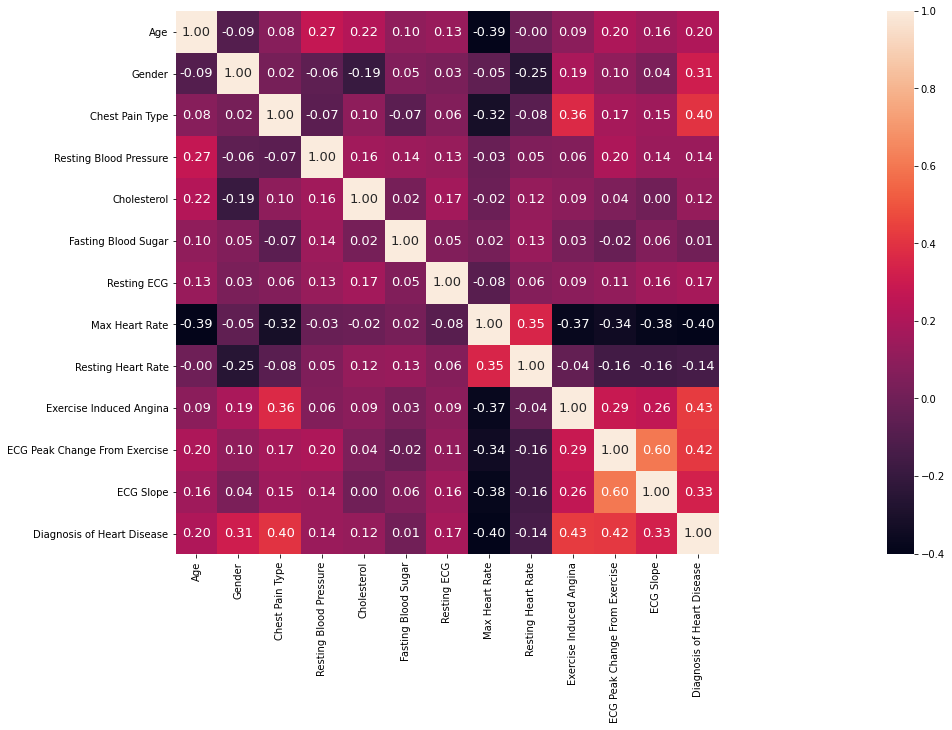

In [30]:
data_columns = ['Age',
        'Gender',
        'Chest Pain Type', 
        'Resting Blood Pressure',
        'Cholesterol',
        'Fasting Blood Sugar',
        'Resting ECG',
        'Max Heart Rate',
        'Resting Heart Rate',
        'Exercise Induced Angina',
        'ECG Peak Change From Exercise',
        'ECG Slope',
        'Diagnosis of Heart Disease']

cm = np.corrcoef(processed_heart_data_subset[data_columns].values.T)

pl.figure(figsize=(60,10))

hm = sns.heatmap(cm,cbar = True, annot = True,square = True, fmt = '.2f', 
                 annot_kws = {'size':13}, yticklabels = data_columns, xticklabels = data_columns)

### Heart Rate Distributions

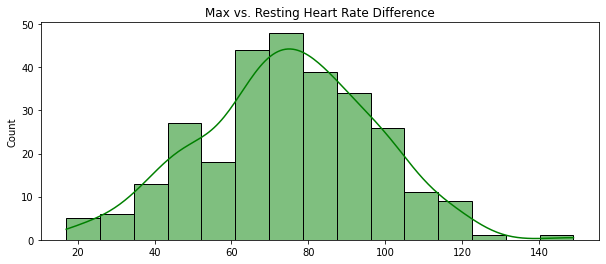

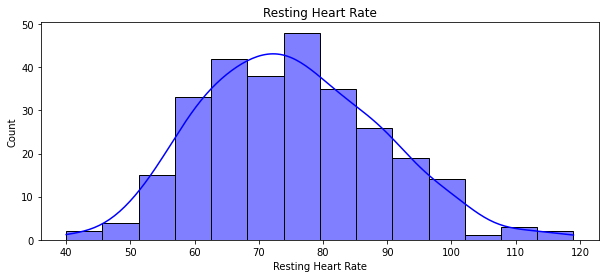

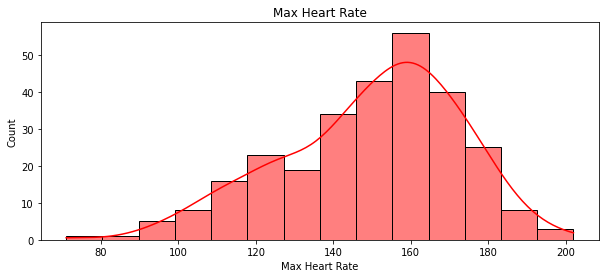

In [31]:
# Heart rate distributions

pl.figure(figsize=(10,4))
pl.title("Max vs. Resting Heart Rate Difference")
ax = sns.histplot(processed_heart_data_subset['Max Heart Rate'] - processed_heart_data_subset['Resting Heart Rate'], kde=True, color = 'g')

pl.figure(figsize=(10,4))
pl.title("Resting Heart Rate")
ax = sns.histplot(processed_heart_data_subset['Resting Heart Rate'], kde=True,color = 'b')

pl.figure(figsize=(10,4))
pl.title("Max Heart Rate")
ax = sns.histplot(processed_heart_data_subset['Max Heart Rate'], kde=True, color = 'r')

### Does the Type of Chest Pain Influence a Postive Diagnosis?
- 1: Typical angina
- 2: Atypical angina
- 3: Non-anginal pain
- 4: Asymptomatic

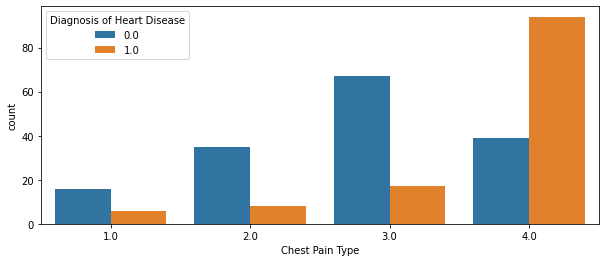

In [13]:
pl.figure(figsize=(10,4))
ax = sns.countplot(x='Chest Pain Type', hue='Diagnosis of Heart Disease', data=processed_heart_data_subset)

### Is heart disease more prone to occur in males (1) or females (0)?

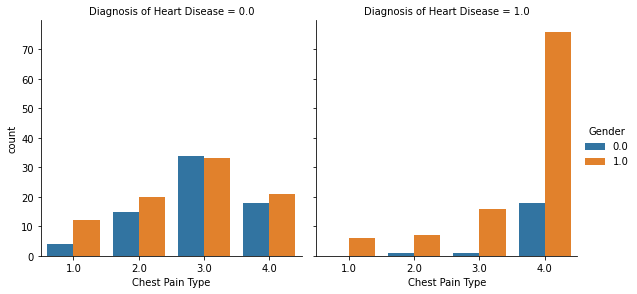

In [14]:
ax = sns.catplot(x='Chest Pain Type', hue='Gender', col='Diagnosis of Heart Disease', data=processed_heart_data_subset, kind="count", height=4, aspect=1)

### Is a Lower Max Heart Rate in Relation to Older Age a Sign of Heart Disease?

<AxesSubplot:xlabel='Age', ylabel='Max Heart Rate'>

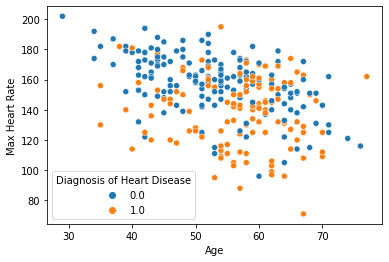

In [15]:
sns.scatterplot(data=processed_heart_data_subset, x="Age", y="Max Heart Rate", hue='Diagnosis of Heart Disease')

# Export Classifier

In [16]:
# Save classifier to file for export to web server

from joblib import dump, load

dump(heart_disease_classifier, filename="heart_disease_classifier.joblib")

['heart_disease_classifier.joblib']